In [15]:
import json

def load_captions(filepath):
    captions = {}
    cap_list = []
    with open(filepath, 'r') as fin:
        cap_list = json.load(fin)
    for cap in cap_list:
        captions[cap['image_id']] = cap['caption']
    return captions

captions = []
beam_widths = ['1','3','5','10']
for i in beam_widths:
    captions.append(load_captions('./results/predictions_beam_width_'+str(i)+'.json'))

keys = list(captions[0].keys())


loading annotations into memory...
Done (t=0.21s)
creating index...
index created!




Example: 1
Ground truth:
three photos of a male doll slowly getting undressed
A doll that has a removable shirt and tie.
A male mannequin in progressive states of undress.
A doll of a man withing a plaid shirt and tie.
Three images of a male doll wearing a shirt in three different fashions.


NIC caption (beam_width = 1): <start> a group of people standing next to each other . <end>
NIC caption (beam_width = 3): <start> a group of people standing next to each other . <end>
NIC caption (beam_width = 5): <start> a group of people standing next to each other . <end>
NIC caption (beam_width = 10): <start> a group of people standing next to each other . <end>


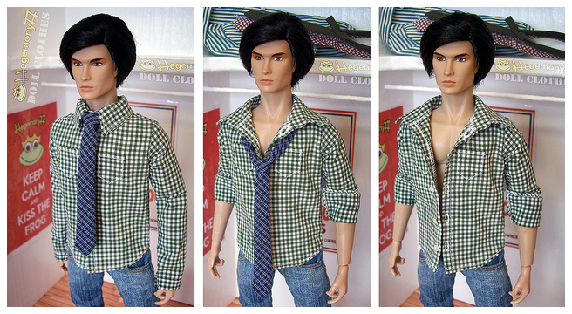


Example: 2
Ground truth:
A baseball player holding a bat on a field.
a baseball player swings his bat at a pitch
A batter is at the plate getting ready to swing at the pitch.
a player is swinging a baseball bat during a game
A baseball player gets ready to hit a ball


NIC caption (beam_width = 1): <start> a baseball player swinging a bat at a ball <end>
NIC caption (beam_width = 3): <start> a baseball player swinging a bat at a ball <end>
NIC caption (beam_width = 5): <start> a baseball player swinging a bat at a ball . <end>
NIC caption (beam_width = 10): <start> a baseball player swinging a bat on top of a field . <end>


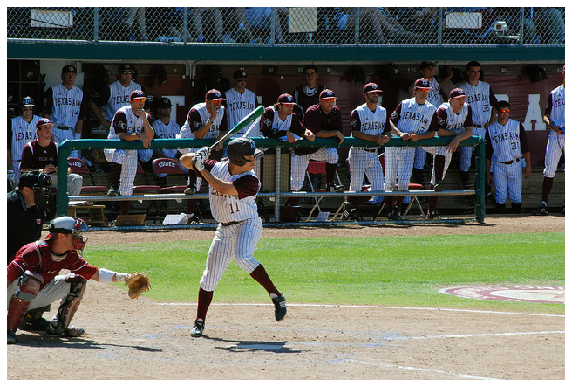


Example: 3
Ground truth:
Two people sitting at a table with a cake in front of them.
Two peple  with a cake that has a building on it.
two people are cutting into a cake with forks
A man and woman sitting at a table in front of a cake.
Man and woman posed in front of a ceremonial cake.


NIC caption (beam_width = 1): <start> a man cutting a cake with a knife and fork . <end>
NIC caption (beam_width = 3): <start> a woman cutting a cake with a knife . <end>
NIC caption (beam_width = 5): <start> a woman cutting a cake with a knife . <end>
NIC caption (beam_width = 10): <start> a woman cutting a piece of cake with a knife . <end>


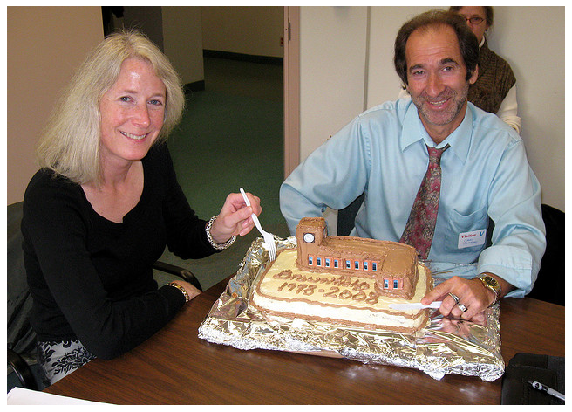


Example: 4
Ground truth:
A person in the heavy snow on a snowboard.
A little boy riding skis down the side of a snow covered slope.
A skier in the snow in a wooded area.
a person snow skiing down a mountain  between trees
A person skiing down a hill with goggles on.


NIC caption (beam_width = 1): <start> a person on a snowboard in the snow . <end>
NIC caption (beam_width = 3): <start> a man riding a snowboard down the side of a snow covered slope . <end>
NIC caption (beam_width = 5): <start> a man riding a snowboard down the side of a snow covered slope . <end>
NIC caption (beam_width = 10): <start> a man riding a snowboard down the side of a snow covered slope . <end>


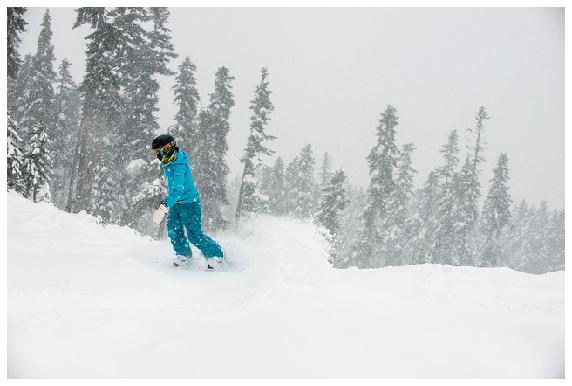


Example: 5
Ground truth:
A sink and refrigerator in a small room.
A quaint all white kitchen with many cabinets.
a kitchen with pale tiled floors and white cabinetry.
Kitchen with white cupboards and appliances and a tan checkerboard linoleum floor. 
The washer and dryer are in the kitchen.


NIC caption (beam_width = 1): <start> a kitchen with a stove , refrigerator , and sink . <end>
NIC caption (beam_width = 3): <start> a kitchen with a stove , refrigerator , sink and cabinets . <end>
NIC caption (beam_width = 5): <start> a kitchen with a refrigerator and a stove top oven . <end>
NIC caption (beam_width = 10): <start> the kitchen is clean and ready for us to use . <end>


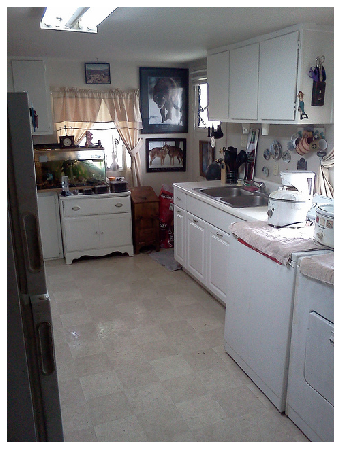

In [18]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import skimage.io as io
import pylab
import glob
import sys
pylab.rcParams['figure.figsize'] = (10.0, 8.0)

sys.path.append('../coco-caption')
from pycocotools.coco import COCO
annFile='./data/annotations/captions_val2014.json'
coco = COCO(annFile)
print('\n\n')

np.random.shuffle(keys)
samples = keys[:5]
cnt = 0
for img in samples:
    annIds = coco.getAnnIds(imgIds=img)
    anns = coco.loadAnns(annIds)
    cnt += 1
    print(f'\nExample: {cnt}')
    print('Ground truth:')
    coco.showAnns(anns)
    plt.figure()
    filepath = glob.glob(f'./data/val2014/*{img}*')[0]
    I = io.imread(filepath)
    print('\n')
    for i in range(len(beam_widths)):
        print(f'NIC caption (beam_width = {beam_widths[i]}): {captions[i][img]}')

    plt.imshow(I)
    plt.axis('off')
    plt.show()
